# Examine what effect the number of ensemble members has

**Figure 3**

### Author: Chris Wyburn-Powell, [github](https://github.com/chrisrwp/synthetic-ensemble/SIA/Time_period_and_sigma.ipynb)

**Input**: <br>
Sea ice area for 6 CLIVAR LE models and observations from HadISST1 historical and RCP8.5. <br>

**Output**: <br>
- $\sigma_{LE}$, $\sigma_{mem}$ and $\sigma_{obs}$ using a range of different time period lengths from 6 year to the full length of the linear trend

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.patheffects as pe
import xarray as xr
import datetime
import dask
print(datetime.datetime.utcnow().strftime("%H:%M UTC %a %Y-%m-%d"))

14:05 UTC Tue 2022-04-26


In [18]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

model_names        = ['CanESM2', 'CESM1', 'CSIRO_MK36',  'GFDL_CM3', 'GFDL_ESM2M', 'MPI_ESM1']
model_print_names  = ['CanESM2', 'CESM1', 'CSIRO MK3.6', 'GFDL CM3', 'GFDL ESM2M', 'MPI ESM1']
obs_names          = ['HadISST1']
mem_len   = [50,  40,  30,  20,  30,  100]
start_yrs = [1950,1920,1850,1920,1950,1850]
colors    = ['m', 'b', 'g', 'orange', 'k', 'tab:olive']

# Subsample the members

In [5]:
#load detrended data
CLIVAR_det_ind = xr.open_dataset('/glade/campaign/univ/ucub0084/Synthetic_ensemble/SIA/SIA_detrended/CLIVAR_SIA_detrended_individual_79-20.nc')
# CLIVAR_det_ens = xr.open_dataset(path+'SIA/SIA_detrended/CLIVAR_SIA_detrended_ensemble_79-20.nc')

#compute the standard deviation with respect to time for each month
ind_SD = CLIVAR_det_ind.groupby('time.month').std('time')
# ens_SD = CLIVAR_det_ens.groupby('time.month').std('time')

## $\sigma_{LE}$

In [6]:
def bootstrap_month_model(sd_time, mem_n, resamp_n):
    
    SD_LE = []
    
    for mem_n_i in np.arange(2,mem_n+1,1): #loop through 2 the maximum number of members

        temp_SD_list = [] #initialize array to record all the resamplings

        for resamp_i in range(resamp_n):
            #make a list of random numbers between 0 and last member element - bootstrapping
            # rand_i_list = np.random.randint(0,mem_n-1, size=mem_n_i)
            #make a list of random numbers between 0 and last member element without replacement - subsampling
            rand_i_list = np.random.choice(np.arange(0,mem_n), size=mem_n_i, replace=False) 
            temp_SD_list.append(sd_time.isel(member=rand_i_list).std('member'))

        SD_LE.append(np.mean(temp_SD_list))

    #make an xarray object with properly named coordinates for members
    SD_LE = xr.DataArray(data   = SD_LE,
                         coords = {'n_members':np.arange(2,mem_n+1,1)},
                         dims   = ['n_members'])
    
    return(SD_LE)

In [7]:
boostrapped_ind = []
# boostrapped_ens = []

for month_ in [3,9]:
    print(datetime.datetime.now(), month_)
    month_ind = []
#     month_ens = []
    
    for model_i, model_name in enumerate(model_names):
        print(datetime.datetime.now(), model_name)
        month_ind.append(bootstrap_month_model(ind_SD[model_name].sel(month=month_), mem_len[model_i], 1000))
#         month_ens.append(bootstrap_month_model(ens_SD[model_name].sel(month=month_), mem_len[model_i], 1000))
        
    boostrapped_ind.append(xr.concat((month_ind), dim='model'))
#     boostrapped_ens.append(xr.concat((month_ens), dim='model'))
    
boostrapped_ind = xr.concat((boostrapped_ind), dim='month')
boostrapped_ind['month'] = [3,9]
boostrapped_ind['model'] = model_names

# boostrapped_ens = xr.concat((boostrapped_ens), dim='month')
# boostrapped_ens['month'] = [3,9]
# boostrapped_ens['model'] = model_names

2022-04-21 16:05:06.895119 3
2022-04-21 16:05:06.895183 CanESM2
2022-04-21 16:05:19.755712 CESM1
2022-04-21 16:05:30.166269 CSIRO_MK36
2022-04-21 16:05:37.628713 GFDL_CM3
2022-04-21 16:05:42.561828 GFDL_ESM2M
2022-04-21 16:05:49.867277 MPI_ESM1
2022-04-21 16:06:15.317968 9
2022-04-21 16:06:15.318195 CanESM2
2022-04-21 16:06:28.466132 CESM1
2022-04-21 16:06:38.631537 CSIRO_MK36
2022-04-21 16:06:46.159577 GFDL_CM3
2022-04-21 16:06:51.266095 GFDL_ESM2M
2022-04-21 16:06:58.691409 MPI_ESM1


## $\sigma_{mem}$

In [9]:
#load sigma_mem
sigma_mem = xr.open_dataset(path+'SIA/SIA_resampled/Sigma_mem_individual_10000.nc')

In [16]:
boostrapped_mem = []

for month_ in [3,9]:
    print(datetime.datetime.now(), month_)
    month_mem = []
    
    for model_i, model_name in enumerate(model_names):
        print(datetime.datetime.now(), model_name)
        month_mem.append(bootstrap_month_model(sigma_mem[model_name].sel(month=month_), mem_len[model_i], 1000))
        
    boostrapped_mem.append(xr.concat((month_mem), dim='model'))
    
boostrapped_mem = xr.concat((boostrapped_mem), dim='month')
boostrapped_mem['month'] = [3,9]
boostrapped_mem['model'] = model_names

In [15]:
boostrapped_mem = xr.concat((boostrapped_mem), dim='month')
boostrapped_mem['month'] = [3,9]
boostrapped_mem['model'] = model_names

# Plot
## $\sigma_{LE}$
## Fig 3 as submitted

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


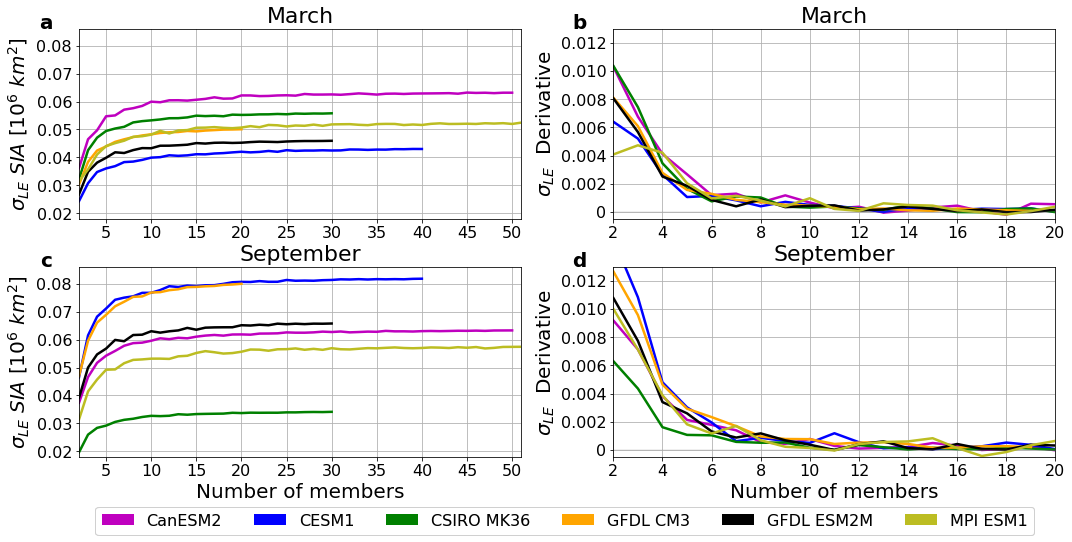

In [16]:
#1979-2020
#open the dataset
data = boostrapped_ind.copy() #change for ind or ens

fig, axes = plt.subplots(2,2,figsize=[15,8])

#plot the sigma LE with number of members
for i, month_ in enumerate([3,9]):
    
    for model_i, model_name in enumerate(model_names):
        axes[i][0].plot(np.arange(2,101,1), data.sel(model=model_name).sel(month=month_), c=colors[model_i], linewidth=2.5)
        
    axes[i][0].set_ylim(0.018,0.086) #max 0.083 for ind, 0.086 for ens
    axes[i][0].set_ylabel(r'$\sigma_{LE} \ SIA \ [10^6 \ km^2]$', fontsize=20);
    axes[i][0].set_yticklabels(np.round(np.arange(0.01,0.09,0.01),2), fontsize=16)
    axes[i][0].set_xlim(2,51)
    axes[i][0].set_xticks(np.arange(5,51,5))
    axes[i][0].set_xticklabels(np.round(np.arange(5,51,5)), fontsize=16)
    axes[i][0].set_title(['March','September'][i], fontsize=22)
    axes[i][1].set_title(['March','September'][i], fontsize=22)
    axes[i][0].grid()

    
    for model_i, model_name in enumerate(model_names):
        axes[i][1].plot(np.arange(2,101,1), np.gradient(data.sel(model=model_name).sel(month=month_)), c=colors[model_i], linewidth=2.5)
        
    axes[i][1].axhline(0, c='0.5', linewidth=0.25)
    axes[i][1].set_ylabel(r'$\sigma_{LE}$  Derivative', fontsize=20);
    axes[i][1].set_ylim(-0.0005,0.013)
    axes[i][1].set_yticks(np.arange(0,0.013,0.002))
    axes[i][1].set_yticklabels(['0', '0.002', '0.004', '0.006', '0.008', '0.010', '0.012'], fontsize=16)
    axes[i][1].set_xlim(2,20)
    axes[i][1].set_xticks(np.arange(2,21,2))    
    axes[i][1].set_xticklabels(np.round(np.arange(2,21,2)), fontsize=16)   
    axes[i][1].grid()
    
legend_elements = [Patch(facecolor=colors[0], label='CanESM2'),
                   Patch(facecolor=colors[1], label='CESM1'),
                   Patch(facecolor=colors[2], label='CSIRO MK36'),
                   Patch(facecolor=colors[3], label='GFDL CM3'),
                   Patch(facecolor=colors[4], label='GFDL ESM2M'),
                   Patch(facecolor=colors[5], label='MPI ESM1'),]



extra_legend = plt.legend(handles=legend_elements, bbox_to_anchor=(-0.11, -0.41), loc='lower center', borderaxespad=0, ncol=6, fontsize=16)
plt.gca().add_artist(extra_legend);

axes[1][0].set_xlabel('Number of members', fontsize=20)
axes[1][1].set_xlabel('Number of members', fontsize=20)
axes[0][0].text(-0.06, 1.08, 'a', transform=axes[0][0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right');
axes[0][1].text(-0.06, 1.08, 'b', transform=axes[0][1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right');
axes[1][0].text(-0.06, 1.08, 'c', transform=axes[1][0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right');
axes[1][1].text(-0.06, 1.08, 'd', transform=axes[1][1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right');

plt.tight_layout()
fig.subplots_adjust(bottom=0.2)
fig.savefig('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/figures/Member_number_and_sigma/Subsampling_Sigma_LE.pdf', bbox_inches='tight') #change file name for ind or ens
# fig.savefig('/glade/scratch/cwpowell/Synthetic_ensemble/SIA/figures/Member_number_and_sigma/Bootstrapping_ind_larger.png', 
            # dpi=400, bbox_inches='tight')

## Bootstrap $\sigma_{mem}$ and $\sigma_{obs}$ 10,000 times for 20 ensemble members

In [161]:
sigma_mem = xr.open_dataset(path+'SIA/SIA_resampled/Sigma_mem_individual_10000.nc')

# sigma_mem = xr.open_dataset(path+'SIA/SIA_resampled/Mu_mem_individual_10000.nc')

mem_n = 50

boostrapped_min = {}
boostrapped_max = {}

for model_i, model_name in enumerate(model_names):
    print(datetime.datetime.now(), model_name)
    month_min = []
    month_max = []
    
    for month_ in np.arange(1,13):
        if month_ %6 == 0: print(datetime.datetime.now(), month_)
        
        boot_mins = []
        boot_maxs = []
        for boot_i in range(10000):
            temp_mems = sigma_mem[model_name].sel(month=month_).sel(member=np.random.randint(1,mem_len[model_i]+1,mem_n))
            boot_mins.append(temp_mems.min())
            boot_maxs.append(temp_mems.max())

        month_min.append(xr.concat((boot_mins),dim='bootstrap_i').mean('bootstrap_i'))
        month_max.append(xr.concat((boot_maxs),dim='bootstrap_i').mean('bootstrap_i'))
        
    boostrapped_min[model_name] = xr.concat((month_min),dim='month')
    boostrapped_max[model_name] = xr.concat((month_max),dim='month')

2022-04-04 14:28:18.093476 CanESM2
2022-04-04 14:30:32.408214 6
2022-04-04 14:33:13.499883 12
2022-04-04 14:33:40.445699 CESM1
2022-04-04 14:35:50.897620 6
2022-04-04 14:38:27.384577 12
2022-04-04 14:38:53.843613 CSIRO_MK36
2022-04-04 14:40:59.499369 6
2022-04-04 14:43:31.673280 12
2022-04-04 14:43:56.645692 GFDL_CM3
2022-04-04 14:45:48.437767 6
2022-04-04 14:48:02.841762 12
2022-04-04 14:48:25.140201 GFDL_ESM2M
2022-04-04 14:50:30.777239 6
2022-04-04 14:53:01.642889 12
2022-04-04 14:53:26.618314 MPI_ESM1
2022-04-04 14:55:51.107560 6
2022-04-04 14:58:43.583068 12


In [162]:
#save to NetCDF 
boostrapped_min_xr = xr.Dataset(boostrapped_min)
boostrapped_max_xr = xr.Dataset(boostrapped_max)

boostrapped_min_xr.to_netcdf('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/bootstrap_50_members_1000_sigma_mem_min.nc')
boostrapped_max_xr.to_netcdf('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/bootstrap_50_members_1000_sigma_mem_max.nc')

In [160]:
!ls -lh /glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/

total 12M
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  1 16:42 bootstrap_20_members_10000_mu_mem_max.nc
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  1 16:42 bootstrap_20_members_10000_mu_mem_min.nc
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  1 19:43 bootstrap_20_members_10000_sigma_mem_max.nc
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  1 19:43 bootstrap_20_members_10000_sigma_mem_min.nc
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  4 09:02 bootstrap_50_members_1000_mu_mem_max.nc
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  4 09:02 bootstrap_50_members_1000_mu_mem_min.nc
-rw-r--r-- 1 cwpowell ucub0084  68K Apr  1 21:49 bootstrap_members_1000_mu_mem_max.nc
-rw-r--r-- 1 cwpowell ucub0084  68K Apr  1 21:49 bootstrap_members_1000_mu_mem_min.nc
-rw-r--r-- 1 cwpowell ucub0084  68K Apr  2 08:31 bootstrap_members_1000_sigma_mem_max.nc
-rw-r--r-- 1 cwpowell ucub0084  68K Apr  2 08:31 bootstrap_members_1000_sigma_mem_min.nc
-rw-r--r-- 1 cwpowell ucub0084 5.5M Mar 31 16:19 bootstrap_members_100_sigma_mem_max.nc
-rw-r--r

In [159]:
sigma_mem = xr.open_dataset(path+'SIA/SIA_resampled/Sigma_mem_individual_10000.nc')
# sigma_mem = xr.open_dataset(path+'SIA/SIA_resampled/Mu_mem_individual_10000.nc')

mem_n = 50

boostrapped_min = {}
boostrapped_max = {}

for model_i, model_name in enumerate(model_names):
    print(datetime.datetime.now(), model_name)
    month_min = []
    month_max = []
    
    for month_ in np.arange(1,13):
        if month_ %6 == 0: print(datetime.datetime.now(), month_)
        
        boot_mins = []
        boot_maxs = []
        for boot_i in range(1000):
            temp_mems = sigma_mem[model_name].sel(month=month_).sel(member=np.random.randint(1,mem_len[model_i]+1,mem_n))
            boot_mins.append(temp_mems.min())
            boot_maxs.append(temp_mems.max())

        month_min.append(xr.concat((boot_mins),dim='bootstrap_i').mean('bootstrap_i'))
        month_max.append(xr.concat((boot_maxs),dim='bootstrap_i').mean('bootstrap_i'))
        
    boostrapped_min[model_name] = xr.concat((month_min),dim='month')
    boostrapped_max[model_name] = xr.concat((month_max),dim='month')

2022-04-04 09:02:41.723460 CanESM2
2022-04-04 09:02:54.651279 6
2022-04-04 09:03:10.599301 12
2022-04-04 09:03:13.232002 CESM1
2022-04-04 09:03:25.631500 6
2022-04-04 09:03:40.585585 12
2022-04-04 09:03:42.983189 CSIRO_MK36
2022-04-04 09:03:54.917362 6
2022-04-04 09:04:09.180976 12
2022-04-04 09:04:11.641206 GFDL_CM3
2022-04-04 09:04:22.198636 6
2022-04-04 09:04:34.971008 12
2022-04-04 09:04:37.020555 GFDL_ESM2M
2022-04-04 09:04:49.019492 6
2022-04-04 09:05:03.371343 12
2022-04-04 09:05:05.819791 MPI_ESM1
2022-04-04 09:05:19.555451 6
2022-04-04 09:05:36.017627 12


In [158]:
#save to NetCDF 
boostrapped_min_xr = xr.Dataset(boostrapped_min)
boostrapped_max_xr = xr.Dataset(boostrapped_max)

boostrapped_min_xr.to_netcdf('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/bootstrap_50_members_1000_sigma_mem_min.nc')
boostrapped_max_xr.to_netcdf('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/bootstrap_50_members_1000_sigma_mem_max.nc')

## Figure 3 as revised

In [133]:
#load sigma_mem
sigma_mem = xr.open_dataset(path+'SIA/SIA_resampled/Sigma_mem_individual_10000.nc')
# sigma_mem = xr.open_dataset(path+'SIA/SIA_resampled/Mu_mem_individual_10000.nc')

boostrapped_min = {}
boostrapped_max = {}

for model_i, model_name in enumerate(model_names):
    print(datetime.datetime.now(), model_name)
    month_min = []
    month_max = []
    
    for month_ in np.arange(1,13):
        if month_ %4 == 0: print(datetime.datetime.now(), month_)
        
        mem_mins = []
        mem_maxs = []
        for mem_n in np.arange(2,mem_len[model_i]+1):
        
            boot_mins = []
            boot_maxs = []
            for boot_i in range(1000):
                temp_mems = sigma_mem[model_name].sel(month=month_).sel(member=np.random.randint(1,mem_len[model_i]+1,mem_n))
                boot_mins.append(temp_mems.min())
                boot_maxs.append(temp_mems.max())
                
            mem_mins.append(xr.concat((boot_mins),dim='bootstrap_i').mean('bootstrap_i'))
            mem_maxs.append(xr.concat((boot_maxs),dim='bootstrap_i').mean('bootstrap_i'))
            
        month_min.append(xr.concat((mem_mins),dim='member'))
        month_max.append(xr.concat((mem_maxs),dim='member'))
        
    boostrapped_min[model_name] = xr.concat((month_min),dim='month')
    boostrapped_max[model_name] = xr.concat((month_max),dim='month')

2022-04-02 06:21:40.121848 CanESM2
2022-04-02 06:28:40.788806 4
2022-04-02 06:36:15.798003 8
2022-04-02 06:43:50.596279 12
2022-04-02 06:45:44.588185 CESM1
2022-04-02 06:50:05.219681 4
2022-04-02 06:55:52.899727 8
2022-04-02 07:01:45.178956 12
2022-04-02 07:03:16.912493 CSIRO_MK36
2022-04-02 07:06:26.518669 4
2022-04-02 07:10:34.994866 8
2022-04-02 07:14:43.395906 12
2022-04-02 07:15:45.684780 GFDL_CM3
2022-04-02 07:17:46.981791 4
2022-04-02 07:20:27.882013 8
2022-04-02 07:23:11.441519 12
2022-04-02 07:23:51.929521 GFDL_ESM2M
2022-04-02 07:27:03.908759 4
2022-04-02 07:31:18.474253 8
2022-04-02 07:35:25.954968 12
2022-04-02 07:36:27.926140 MPI_ESM1
2022-04-02 07:50:23.429250 4
2022-04-02 08:08:55.327927 8
2022-04-02 08:27:13.528446 12


In [134]:
#save to NetCDF 
for model_i, model_name in enumerate(model_names):
    boostrapped_min[model_name]['member'] = np.arange(2,mem_len[model_i]+1)
    boostrapped_max[model_name]['member'] = np.arange(2,mem_len[model_i]+1)
    
boostrapped_min_xr = xr.Dataset(boostrapped_min)
boostrapped_max_xr = xr.Dataset(boostrapped_max)

boostrapped_min_xr.to_netcdf('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/bootstrap_members_1000_sigma_mem_min.nc')
boostrapped_max_xr.to_netcdf('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/bootstrap_members_1000_sigma_mem_max.nc')

In [136]:
#open from NetCDF
mu_min_boot = xr.open_dataset('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/bootstrap_members_1000_mu_mem_min.nc')
mu_max_boot = xr.open_dataset('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/bootstrap_members_1000_mu_mem_max.nc')

sigma_min_boot = xr.open_dataset('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/bootstrap_members_1000_sigma_mem_min.nc')
sigma_max_boot = xr.open_dataset('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/bootstrap_members_1000_sigma_mem_max.nc')

sigma_obs = xr.open_dataset('/glade/scratch/cwpowell/Synthetic_ensemble/SIA/SIA_resampled/Sigma_obs_individual_10000.nc')

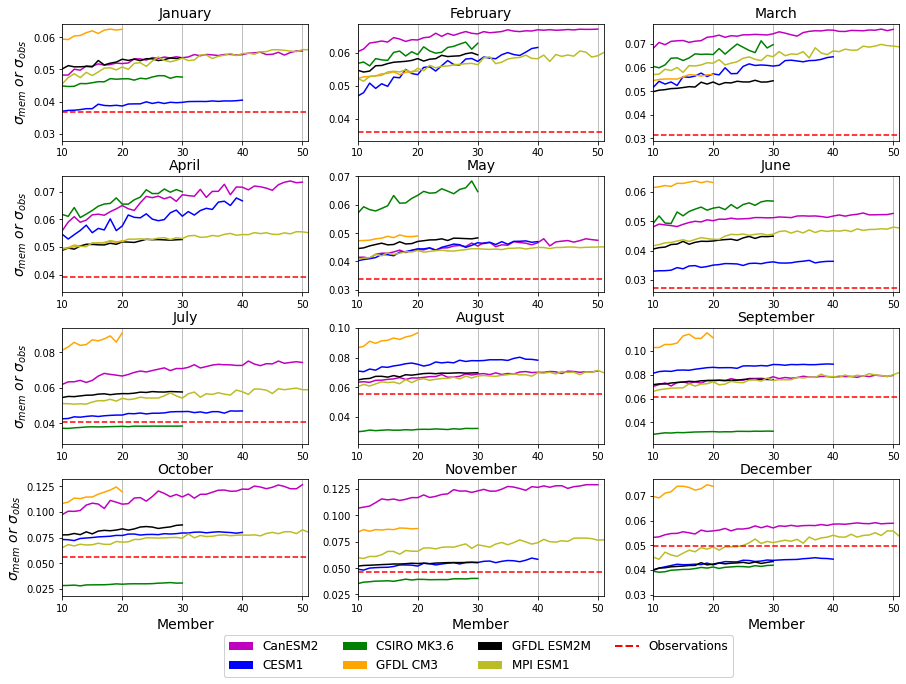

In [5]:
fig, axes = plt.subplots(4,3,figsize=[15,10])
for month_ in np.arange(1,13):
    ax_x = int(np.floor((month_-1)/3))
    ax_y = int((month_-1)%3)
    
    for model_i, model_name in enumerate(model_names):
        axes[ax_x][ax_y].plot(np.arange(2,101), boostrapped_max_xr[model_name].sel(month=month_).mean('bootstrap_i'), c=colors[model_i])
                
    axes[ax_x][ax_y].axhline(sigma_obs.drop('Merged').drop('SII').to_array().max('variable').sel(month=month_), linestyle='--', c='r')
        
    
    axes[ax_x][ax_y].set_title(month_names[month_-1], fontsize=14)
    axes[ax_x][ax_y].set_xlim(10,51)
    axes[ax_x][ax_y].grid(axis='x', which='both')
    # axes[ax_x][ax_y].set_ylim(0,25)
    # # axes[ax_x][ax_y].axhline(0, c='k', linestyle='--')
    
    if month_ in [1,4,7,10]:
        axes[ax_x][ax_y].set_ylabel(r'$\sigma_{mem} \ or \ \sigma_{obs}$', fontsize=14)
        
    if month_ > 9:
        axes[ax_x][ax_y].set_xlabel('Member', fontsize=14)

plt.subplots_adjust(top=0.92, hspace=0.3, wspace=0.2)
# plt.suptitle(r'Monlthy Scores, Region {}, $\alpha$ = {}'.format(region_, alpha_val), fontsize=20);

legend_elements = [Patch(facecolor=colors[0], label='CanESM2'),
                   Patch(facecolor=colors[1], label='CESM1'),
                   Patch(facecolor=colors[2], label='CSIRO MK3.6'),
                   Patch(facecolor=colors[3], label='GFDL CM3'),
                   Patch(facecolor=colors[4], label='GFDL ESM2M'),
                   Patch(facecolor=colors[5], label='MPI ESM1'),
                   Line2D([0], [0], color=(1,0,0), ls='--', lw=2, label='Observations')]

extra_legend = plt.legend(handles=legend_elements, bbox_to_anchor=(-0.71, -0.69), loc='lower center', borderaxespad=0, ncol=4, fontsize=12)
plt.gca().add_artist(extra_legend);

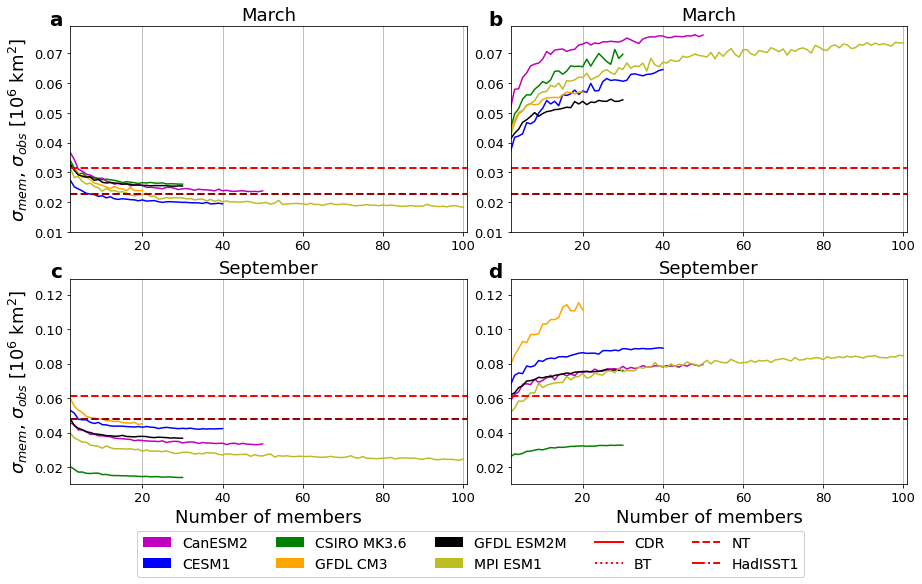

In [95]:
fig, axes = plt.subplots(2,2,figsize=[15,8])
    
for model_i, model_name in enumerate(model_names):
    axes[0][0].plot(np.arange(2,101), boostrapped_min_xr[model_name].sel(month=3).mean('bootstrap_i'), c=colors[model_i], linewidth=1.5)
    axes[0][1].plot(np.arange(2,101), boostrapped_max_xr[model_name].sel(month=3).mean('bootstrap_i'), c=colors[model_i], linewidth=1.5)
    axes[1][0].plot(np.arange(2,101), boostrapped_min_xr[model_name].sel(month=9).mean('bootstrap_i'), c=colors[model_i], linewidth=1.5)
    axes[1][1].plot(np.arange(2,101), boostrapped_max_xr[model_name].sel(month=9).mean('bootstrap_i'), c=colors[model_i], linewidth=1.5)

for ax_y in [0,1]:    
    # axes[ax_y][0].set_ylabel(r'Minimum $\sigma_{mem}$, $\sigma_{obs}$', fontsize=18)
    # axes[ax_y][1].set_ylabel(r'Maximum $\sigma_{mem}$, $\sigma_{obs}$', fontsize=18)
    axes[ax_y][0].set_ylabel(r'$\sigma_{mem}$, $\sigma_{obs}$ [10$^6$ km$^2$]', fontsize=18)
    
    for ax_x in [0,1]:
        axes[ax_y][ax_x].axhline(sigma_obs.drop('Merged').drop('SII').to_array().min('variable').sel(month=[3,9][ax_y]), linestyle='--', c=(0.6,0,0), linewidth=2)
        axes[ax_y][ax_x].axhline(sigma_obs.drop('Merged').drop('SII').to_array().max('variable').sel(month=[3,9][ax_y]), linestyle='--', c=(1,0,0), linewidth=2)
        # axes[ax_y][ax_x].axhline(sigma_obs['CDR'].sel(month=[3,9][ax_y]), linestyle='solid', c=(1,0,0), linewidth=2)
        # axes[ax_y][ax_x].axhline(sigma_obs['BT'].sel(month=[3,9][ax_y]), linestyle='dotted', c=(1,0,0), linewidth=2)
        # axes[ax_y][ax_x].axhline(sigma_obs['NT'].sel(month=[3,9][ax_y]), linestyle='dashed', c=(1,0,0), linewidth=2)
        # axes[ax_y][ax_x].axhline(sigma_obs['HadISST1'].sel(month=[3,9][ax_y]), linestyle='dashdot', c=(1,0,0), linewidth=2)
        
        axes[ax_y][ax_x].set_xlim(2,101)
        axes[ax_y][ax_x].tick_params(axis='both', which='major', labelsize=13)
        axes[ax_y][ax_x].grid(axis='x', which='both')

        axes[1][ax_x].set_xlabel('Number of members',fontsize=18)
        
    
axes[0][0].set_title('March',fontsize=18)
axes[0][1].set_title('March',fontsize=18)
axes[1][0].set_title('September',fontsize=18)
axes[1][1].set_title('September',fontsize=18)

axes[0][0].set_ylim(0.01,0.079)
axes[0][1].set_ylim(0.01,0.079)
axes[1][0].set_ylim(0.01,0.129)
axes[1][1].set_ylim(0.01,0.129)

axes[0][0].text(-0.02, 1.08, 'a', transform=axes[0][0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right');
axes[0][1].text(-0.02, 1.08, 'b', transform=axes[0][1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right');
axes[1][0].text(-0.02, 1.08, 'c', transform=axes[1][0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right');
axes[1][1].text(-0.02, 1.08, 'd', transform=axes[1][1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right');

    
plt.subplots_adjust(top=0.92, hspace=0.23, wspace=0.11)

legend_elements = [Patch(facecolor=colors[0], label='CanESM2'),
                   Patch(facecolor=colors[1], label='CESM1'),
                   Patch(facecolor=colors[2], label='CSIRO MK3.6'),
                   Patch(facecolor=colors[3], label='GFDL CM3'),
                   Patch(facecolor=colors[4], label='GFDL ESM2M'),
                   Patch(facecolor=colors[5], label='MPI ESM1'),
                   Line2D([0], [0], color=(1,0,0), ls='solid', lw=2, label='CDR'),
                   Line2D([0], [0], color=(1,0,0), ls='dotted', lw=2, label='BT'),
                   Line2D([0], [0], color=(1,0,0), ls='dashed', lw=2, label='NT'),
                   Line2D([0], [0], color=(1,0,0), ls='dashdot', lw=2, label='HadISST1')]

extra_legend = plt.legend(handles=legend_elements, bbox_to_anchor=(-0.1, -0.45), loc='lower center', borderaxespad=0, ncol=5, fontsize=14)
plt.gca().add_artist(extra_legend);

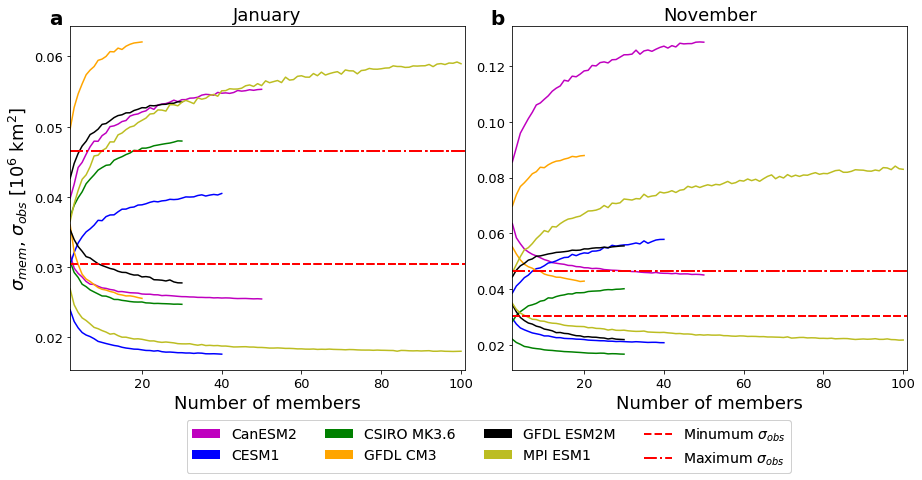

In [155]:
fig, axes = plt.subplots(1,2,figsize=[15,6])
months = [1,11]
    
for model_i, model_name in enumerate(model_names):
    axes[0].plot(np.arange(2,101), sigma_min_boot[model_name].sel(month=months[0]), c=colors[model_i], linewidth=1.5)
    axes[0].plot(np.arange(2,101), sigma_max_boot[model_name].sel(month=months[0]), c=colors[model_i], linewidth=1.5)
    axes[1].plot(np.arange(2,101), sigma_min_boot[model_name].sel(month=months[1]), c=colors[model_i], linewidth=1.5)
    axes[1].plot(np.arange(2,101), sigma_max_boot[model_name].sel(month=months[1]), c=colors[model_i], linewidth=1.5)

    axes[0].set_ylabel(r'$\sigma_{mem}$, $\sigma_{obs}$ [10$^6$ km$^2$]', fontsize=18)
    # axes[1].set_ylabel(r'$\sigma_{mem}$, $\sigma_{obs}$ [10$^6$ km$^2$]', fontsize=18)
    
    for ax_x in [0,1]:
        # axes[ax_x].axhline(sigma_obs.drop('Merged').drop('SII').to_array().min('variable').sel(month=months[ax_y]), linestyle='--', c=(1,0,0), linewidth=2)
        # axes[ax_x].axhline(sigma_obs.drop('Merged').drop('SII').to_array().max('variable').sel(month=months[ax_y]), linestyle='-.', c=(1,0,0), linewidth=2)
        
        ######try fill inbetween to make box!
        # axes[ax_x].axhline(sigma_obs.drop('Merged').drop('SII').to_array().max('variable').sel(month=months[ax_y]), linestyle='-.', c=(1,0,0), linewidth=2)        
        
        axes[ax_x].set_xlim(2,101)
        axes[ax_x].tick_params(axis='both', which='major', labelsize=13)
        axes[ax_x].grid(axis='x', which='both')

        axes[ax_x].set_xlabel('Number of members',fontsize=18)
        
    
axes[0].set_title(month_names[months[0]-1],fontsize=18)
axes[1].set_title(month_names[months[1]-1],fontsize=18)


axes[0].text(-0.02, 1.05, 'a', transform=axes[0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right');
axes[1].text(-0.02, 1.05, 'b', transform=axes[1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right');

    
plt.subplots_adjust(top=0.92, hspace=0.23, wspace=0.12)

legend_elements = [Patch(facecolor=colors[0], label='CanESM2'),
                   Patch(facecolor=colors[1], label='CESM1'),
                   Patch(facecolor=colors[2], label='CSIRO MK3.6'),
                   Patch(facecolor=colors[3], label='GFDL CM3'),
                   Patch(facecolor=colors[4], label='GFDL ESM2M'),
                   Patch(facecolor=colors[5], label='MPI ESM1'),
                   Line2D([0], [0], color=(1,0,0), ls='--', lw=2, label=r'Minumum $\sigma_{obs}$'),
                   Line2D([0], [0], color=(1,0,0), ls='-.', lw=2, label=r'Maximum $\sigma_{obs}$')]

extra_legend = plt.legend(handles=legend_elements, bbox_to_anchor=(-0.06, -0.3), loc='lower center', borderaxespad=0, ncol=4, fontsize=14)
plt.gca().add_artist(extra_legend);


## Subsample (without replacement) to 20 members

In [18]:
# mem_values = xr.open_dataset(path+'SIA/SIA_resampled/Sigma_mem_individual_10000.nc')
mem_values = xr.open_dataset(path+'SIA/SIA_resampled/Mu_mem_individual_10000.nc')

subsample_n = 20

subsample_min = {}
subsample_max = {}

for model_i, model_name in enumerate(model_names):
    print(datetime.datetime.now(), model_name)
    month_min = []
    month_max = []
    
    for month_ in np.arange(1,13):
        if month_ %6 == 0: print(datetime.datetime.now(), month_)
        
        mins = []
        maxs = []
        for boot_i in range(1000):
            temp_mems = mem_values[model_name].sel(month=month_).sel(member=np.random.choice(np.arange(1,mem_len[model_i]+1), subsample_n, replace=False))
            mins.append(temp_mems.min())
            maxs.append(temp_mems.max())

        month_min.append(xr.concat((mins),dim='subsample_i').mean('subsample_i'))
        month_max.append(xr.concat((maxs),dim='subsample_i').mean('subsample_i'))
        
    subsample_min[model_name] = xr.concat((month_min),dim='month')
    subsample_max[model_name] = xr.concat((month_max),dim='month')

2022-04-05 15:32:46.434506 CanESM2
2022-04-05 15:33:10.408601 6
2022-04-05 15:33:38.114991 12
2022-04-05 15:33:42.842558 CESM1
2022-04-05 15:34:06.458945 6
2022-04-05 15:34:34.903432 12
2022-04-05 15:34:39.691135 CSIRO_MK36
2022-04-05 15:35:03.272864 6
2022-04-05 15:35:31.831470 12
2022-04-05 15:35:36.632369 GFDL_CM3
2022-04-05 15:35:53.929746 6
2022-04-05 15:36:14.717799 12
2022-04-05 15:36:18.216537 GFDL_ESM2M
2022-04-05 15:36:42.102488 6
2022-04-05 15:37:10.320905 12
2022-04-05 15:37:14.966839 MPI_ESM1
2022-04-05 15:37:38.869164 6
2022-04-05 15:38:07.004245 12


In [19]:
#save to NetCDF 
subsample_min_xr = xr.Dataset(subsample_min)
subsample_max_xr = xr.Dataset(subsample_max)

subsample_min_xr.to_netcdf('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/subsample_20_members_1000_mu_mem_min.nc')
subsample_max_xr.to_netcdf('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/subsample_20_members_1000_mu_mem_max.nc')

In [65]:
!ls -lh /glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/

total 12M
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  1 16:42 bootstrap_20_members_10000_mu_mem_max.nc
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  1 16:42 bootstrap_20_members_10000_mu_mem_min.nc
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  1 19:43 bootstrap_20_members_10000_sigma_mem_max.nc
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  1 19:43 bootstrap_20_members_10000_sigma_mem_min.nc
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  4 09:02 bootstrap_50_members_1000_mu_mem_max.nc
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  4 09:02 bootstrap_50_members_1000_mu_mem_min.nc
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  4 14:59 bootstrap_50_members_1000_sigma_mem_max.nc
-rw-r--r-- 1 cwpowell ucub0084 9.7K Apr  4 14:59 bootstrap_50_members_1000_sigma_mem_min.nc
-rw-r--r-- 1 cwpowell ucub0084  68K Apr  1 21:49 bootstrap_members_1000_mu_mem_max.nc
-rw-r--r-- 1 cwpowell ucub0084  68K Apr  1 21:49 bootstrap_members_1000_mu_mem_min.nc
-rw-r--r-- 1 cwpowell ucub0084  68K Apr  2 08:31 bootstrap_members_1000_sigma_mem_max.nc
-

## Now subsample for 2 - 100 members

In [21]:
mem_values = xr.open_dataset(path+'SIA/SIA_resampled/Sigma_mem_individual_10000.nc')
# mem_values = xr.open_dataset(path+'SIA/SIA_resampled/Mu_mem_individual_10000.nc')

subsample_min = {}
subsample_max = {}

for model_i, model_name in enumerate(model_names):
    print(datetime.datetime.now(), model_name)
    month_min = []
    month_max = []
    
    for month_ in np.arange(1,13):
        if month_ %6 == 0: print(datetime.datetime.now(), month_)
        
        mem_mins = []
        mem_maxs = []
        for mem_n in np.arange(2,101):
            
            if mem_n >= mem_len[model_i]:
                mem_mins.append(mem_values[model_name].sel(month=month_).min('member'))
                mem_maxs.append(mem_values[model_name].sel(month=month_).max('member'))
            
            else:
                mins = []
                maxs = []
                for boot_i in range(100):
                    temp_mems = mem_values[model_name].sel(month=month_).sel(member=np.random.choice(np.arange(1,mem_len[model_i]+1), mem_n, replace=False))
                
                    mins.append(temp_mems.min())
                    maxs.append(temp_mems.max())

                mem_mins.append(xr.concat((mins),dim='subsample_i').mean('subsample_i'))
                mem_maxs.append(xr.concat((maxs),dim='subsample_i').mean('subsample_i'))
            
        month_min.append(xr.concat((mem_mins),dim='member'))
        month_max.append(xr.concat((mem_maxs),dim='member'))
        
    subsample_min[model_name] = xr.concat((month_min),dim='month')
    subsample_max[model_name] = xr.concat((month_max),dim='month')

In [80]:
#save to NetCDF 
subsample_min_xr = xr.Dataset(subsample_min)
subsample_max_xr = xr.Dataset(subsample_max)

subsample_min_xr.to_netcdf('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/subsample_members_100_mu_mem_min.nc')
subsample_max_xr.to_netcdf('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/subsample_members_100_mu_mem_max.nc')

In [22]:
#load data for plotting
sigma_obs = xr.open_dataset('/glade/scratch/cwpowell/Synthetic_ensemble/SIA/SIA_resampled/Sigma_obs_individual_10000.nc')
# mu_obs = xr.open_dataset('/glade/scratch/cwpowell/Synthetic_ensemble/SIA/SIA_resampled/Mu_obs_individual_10000.nc')

subsample_min = xr.open_dataset('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/subsample_members_100_sigma_mem_min.nc')
subsample_max = xr.open_dataset('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/subsample_members_100_sigma_mem_max.nc')

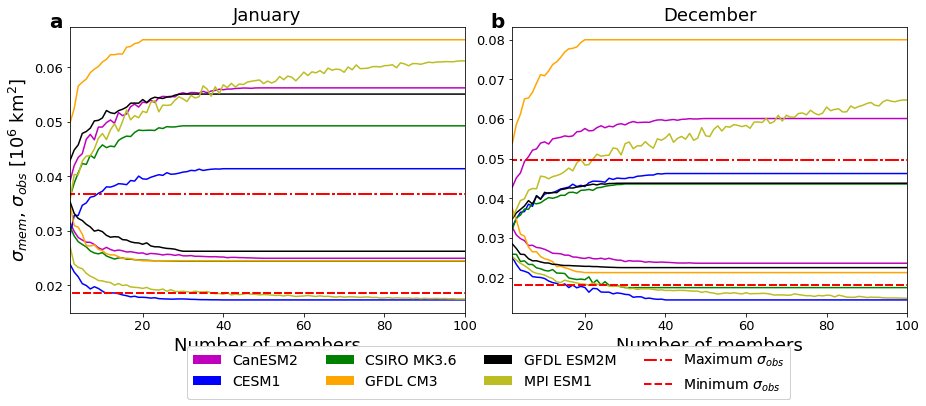

In [90]:
fig, axes = plt.subplots(1,2,figsize=[15,5])
months = [1,12]
    
for model_i, model_name in enumerate(model_names):
    axes[0].plot(np.arange(2,101), subsample_min[model_name].sel(month=months[0]), c=colors[model_i], linewidth=1.5)
    axes[0].plot(np.arange(2,101), subsample_max[model_name].sel(month=months[0]), c=colors[model_i], linewidth=1.5)
    axes[1].plot(np.arange(2,101), subsample_min[model_name].sel(month=months[1]), c=colors[model_i], linewidth=1.5)
    axes[1].plot(np.arange(2,101), subsample_max[model_name].sel(month=months[1]), c=colors[model_i], linewidth=1.5)

    axes[0].set_ylabel(r'$\sigma_{mem}$, $\sigma_{obs}$ [10$^6$ km$^2$]', fontsize=18)
            
    
    for ax_x in [0,1]:
        sigma_obs_month = sigma_obs.drop('Merged').drop('SII').to_array()
        # axes[ax_x].fill_between([0,105],[sigma_obs_month.sel(month=months[ax_x]).min('variable'), sigma_obs_month.sel(month=months[ax_x]).min('variable')],
        #                         [sigma_obs_month.sel(month=months[ax_x]).max('variable'), sigma_obs_month.sel(month=months[ax_x]).max('variable')], 
        #                         color='r', alpha=0.05)
        axes[ax_x].plot([0,101],[sigma_obs_month.sel(month=months[ax_x]).min('variable'),
                                 sigma_obs_month.sel(month=months[ax_x]).min('variable')], ls='--', lw=2, c='r')
        
        axes[ax_x].plot([0,101],[sigma_obs_month.sel(month=months[ax_x]).max('variable'),
                                 sigma_obs_month.sel(month=months[ax_x]).max('variable')], ls='-.', lw=2, c='r')
        
        axes[ax_x].set_xlim(2,100)
        axes[ax_x].tick_params(axis='both', which='major', labelsize=13)
        axes[ax_x].grid(axis='x', which='both')

        axes[ax_x].set_xlabel('Number of members',fontsize=18)
        
    
axes[0].set_title(month_names[months[0]-1],fontsize=18)
axes[1].set_title(month_names[months[1]-1],fontsize=18)


axes[0].text(-0.02, 1.05, 'a', transform=axes[0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right');
axes[1].text(-0.02, 1.05, 'b', transform=axes[1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right');

    
plt.subplots_adjust(top=0.92, hspace=0.23, wspace=0.12)

legend_elements = [Patch(facecolor=colors[0], label='CanESM2'),
                   Patch(facecolor=colors[1], label='CESM1'),
                   Patch(facecolor=colors[2], label='CSIRO MK3.6'),
                   Patch(facecolor=colors[3], label='GFDL CM3'),
                   Patch(facecolor=colors[4], label='GFDL ESM2M'),
                   Patch(facecolor=colors[5], label='MPI ESM1'),
                   Line2D([0], [0], color=(1,0,0), ls='-.', lw=2, label=r'Maximum $\sigma_{obs}$'),
                   Line2D([0], [0], color=(1,0,0), ls='--', lw=2, label=r'Minimum $\sigma_{obs}$')]

extra_legend = plt.legend(handles=legend_elements, bbox_to_anchor=(-0.06, -0.3), loc='lower center', borderaxespad=0, ncol=4, fontsize=14)
plt.gca().add_artist(extra_legend);


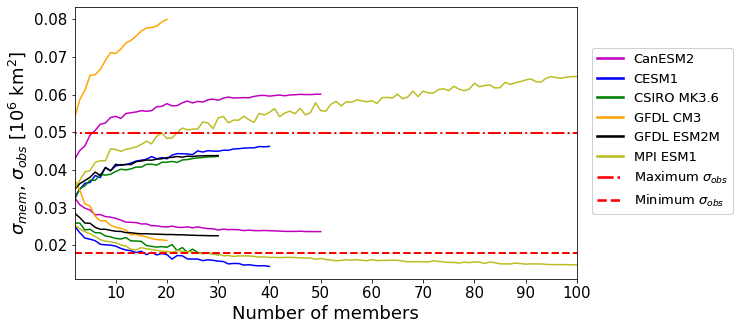

In [37]:
fig = plt.figure(figsize=[9,5])

month_ = 12
sigma_obs_month = sigma_obs.drop('Merged').drop('SII').to_array()

    
for model_i, model_name in enumerate(model_names):
    #N.B. member does not have coordinates, starts from zero
    plt.plot(np.arange(2,mem_len[model_i]+1), subsample_min[model_name].sel(month=month_).sel(member=slice(0,mem_len[model_i]-1)),
                       c=colors[model_i], linewidth=1.5)
    plt.plot(np.arange(2,mem_len[model_i]+1), subsample_max[model_name].sel(month=month_).sel(member=slice(0,mem_len[model_i]-1)), 
                       c=colors[model_i], linewidth=1.5)

plt.ylabel(r'$\sigma_{mem}$, $\sigma_{obs}$ [10$^6$ km$^2$]', fontsize=18)
            
plt.plot([0,101],[sigma_obs_month.sel(month=month_).min('variable'),
                  sigma_obs_month.sel(month=month_).min('variable')], ls='--', lw=2, c='r')

plt.plot([0,101],[sigma_obs_month.sel(month=month_).max('variable'),
                  sigma_obs_month.sel(month=month_).max('variable')], ls='-.', lw=2, c='r')

# plt.fill_between([0,105],[sigma_obs_month.sel(month=months[ax_x]).min('variable'), sigma_obs_month.sel(month=months[ax_x]).min('variable')],
#                          [sigma_obs_month.sel(month=months[ax_x]).max('variable'), sigma_obs_month.sel(month=months[ax_x]).max('variable')], 
#                           color='r', alpha=0.5)
        
plt.xlim(2,100)
plt.xticks(np.arange(10,101,10))
plt.tick_params(axis='both', which='major', labelsize=15)
# plt.grid(axis='x', which='both')
plt.xlabel('Number of members',fontsize=18)

# plt.title(month_names[month_-1],fontsize=18)

legend_elements = [Line2D([0], [0], c=colors[0], lw=2.5, label='CanESM2'),
                   Line2D([0], [0], c=colors[1], lw=2.5, label='CESM1'),
                   Line2D([0], [0], c=colors[2], lw=2.5, label='CSIRO MK3.6'),
                   Line2D([0], [0], c=colors[3], lw=2.5, label='GFDL CM3'),
                   Line2D([0], [0], c=colors[4], lw=2.5, label='GFDL ESM2M'),
                   Line2D([0], [0], c=colors[5], lw=2.5, label='MPI ESM1'),
                   Line2D([0], [0], c='r', ls='-.', lw=2.5, label=r'Maximum $\sigma_{obs}$'),
                   Line2D([0], [0], c='r', ls='--', lw=2.5, label=r'Minimum $\sigma_{obs}$')]

extra_legend = plt.legend(handles=legend_elements, bbox_to_anchor=(1.03, 0.85), loc='upper left', borderaxespad=0, ncol=1, fontsize=13)
plt.gca().add_artist(extra_legend);
fig.savefig('/glade/scratch/cwpowell/Synthetic_ensemble_revisions/SIA/figures/Member_number_and_sigma/December_subsampling_100_sigma_mem_obs_stop_max.pdf', bbox_inches='tight')

## $\sigma_{mem}$, old fig 3

In [27]:
#1979-2020
#open the dataset
data = boostrapped_mem.copy() 

fig, axes = plt.subplots(2,2,figsize=[15,8])

#plot the sigma LE with number of members
for i, month_ in enumerate([3,9]):
    
    for model_i, model_name in enumerate(model_names):
        axes[i][0].plot(np.arange(2,101,1), data.sel(model=model_name).sel(month=month_), c=colors[model_i], linewidth=2.5)
        
    axes[i][0].set_ylim(0.002,0.019) #max 0.083 for ind, 0.086 for ens
    axes[i][0].set_ylabel(r'$\sigma_{mem} \ SIA \ [10^6 \ km^2]$', fontsize=14);
    axes[i][0].set_yticklabels(np.round(np.arange(0.002,0.019,0.002),4), fontsize=12)
    axes[i][0].set_xlim(2,51)
    axes[i][0].set_xticks(np.arange(5,51,5))
    axes[i][0].set_xticklabels(np.round(np.arange(5,51,5)), fontsize=12)
    axes[i][0].grid()

    
    for model_i, model_name in enumerate(model_names):
        axes[i][1].plot(np.arange(2,101,1), np.gradient(data.sel(model=model_name).sel(month=month_)), c=colors[model_i], linewidth=2.5)
        
    axes[i][1].axhline(0, c='0.5', linewidth=0.25)
    axes[i][1].set_ylabel(r'$\frac{d \ \sigma_{mem}}{d \ member} \ SIA \ [10^6 \ km^2 \ member^{-1}]$', fontsize=14);
    axes[i][1].set_ylim(-0.0002,0.0033)
    axes[i][1].set_yticks(np.arange(0,0.0031,0.0005))
    axes[i][1].set_yticklabels(['0', '0.0005', '0.0010', '0.0015', '0.0020', '0.0025', '0.0030'], fontsize=12)
    axes[i][1].set_xlim(2,20)
    axes[i][1].set_xticks(np.arange(2,21,2))    
    axes[i][1].set_xticklabels(np.round(np.arange(2,21,2)), fontsize=12)   
    axes[i][1].grid()
    
legend_elements = [Patch(facecolor=colors[0], label='CanESM2'),
                   Patch(facecolor=colors[1], label='CESM1'),
                   Patch(facecolor=colors[2], label='CSIRO MK36'),
                   Patch(facecolor=colors[3], label='GFDL CM3'),
                   Patch(facecolor=colors[4], label='GFDL ESM2M'),
                   Patch(facecolor=colors[5], label='MPI ESM1'),]

extra_legend = plt.legend(handles=legend_elements, bbox_to_anchor=(0.85, 0.45), loc='lower center', borderaxespad=0, ncol=1, fontsize=12)
plt.gca().add_artist(extra_legend);

axes[1][0].set_xlabel('Number of members', fontsize=14)
axes[1][1].set_xlabel('Number of members', fontsize=14)
axes[0][0].text(-0.06, 1.08, 'a', transform=axes[0][0].transAxes, fontsize=18, fontweight='bold', va='top', ha='right');
axes[0][1].text(-0.06, 1.08, 'b', transform=axes[0][1].transAxes, fontsize=18, fontweight='bold', va='top', ha='right');
axes[1][0].text(-0.06, 1.08, 'c', transform=axes[1][0].transAxes, fontsize=18, fontweight='bold', va='top', ha='right');
axes[1][1].text(-0.06, 1.08, 'd', transform=axes[1][1].transAxes, fontsize=18, fontweight='bold', va='top', ha='right');

plt.tight_layout()
fig.savefig('/glade/scratch/cwpowell/Synthetic_ensemble/SIA/figures/Member_number_and_sigma/Bootstrapping_mem_ind.pdf') #change file name for ind or ens
fig.savefig('/glade/scratch/cwpowell/Synthetic_ensemble/SIA/figures/Member_number_and_sigma/Bootstrapping_mem_ind.png', dpi=400)